# Figure development notebook - FLORIAN

In [118]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import seaborn as sns

### Import data

In [119]:
df_SPE = pd.read_csv(".\DATA\solid-polymer-electrolytes.csv", engine='python')
df_GPE = pd.read_csv(".\DATA\gel-polymer-electrolytes.csv")

### Clean and prepare data

In [120]:

df_SPE.sort_values(by=['class'], inplace=True)
df_GPE.sort_values(by=['class'], inplace=True)


## Figure XX - Solid polymer electrolyte class vs. conductivity box plot

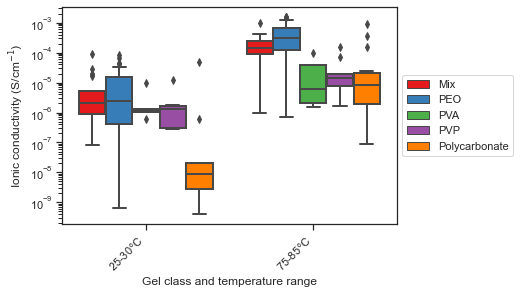

In [121]:
sns.set()
sns.set_style("white")
sns.set_style('ticks')
sns.set_context("notebook", rc={'axes.grid': True})
sns.set_palette('Set1')


# All classes that do not have more than two independent references are excluded
df_SPE_box = df_SPE[
                (df_SPE['class'] != 'Other') & 
                (df_SPE['class'] != 'PAN') & 
                (df_SPE['class'] != 'Polyester') &
                (df_SPE['class'] != 'Poly(IL)') &
                (df_SPE['class'] != 'Nonwoven composite') &
                (df_SPE['class'] != 'Polymerized sodium salt') 
                ]

df_SPE_box = df_SPE_box[
            [
            'class', 
            'conductivity_(20-30)degC', 
            'conductivity_(75-85)degC'
            ]
            ]

df_SPE_box.rename(columns={'conductivity_(20-30)degC': '25-30$\degree$C', 'conductivity_(75-85)degC': '75-85$\degree$C'}, inplace=True)

df_SPE_box_melt = pd.melt(df_SPE_box, id_vars=['class'], value_vars = ['25-30$\degree$C', '75-85$\degree$C'])

SPE_box = sns.boxplot(
                x='variable', 
                y='value', 
                hue='class', 
                data=df_SPE_box_melt,
                dodge=True,
                linewidth=2,
                saturation=1.5,
                ).set(
    xlabel='Gel class and temperature range',
    ylabel='Ionic conductivity (S/cm$^{-1}$)',
    yscale='log',
    )

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    )

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.savefig('.\FIGURES\SPE_class-vs-cond_box.svg', 
           transparent=False)

plt.savefig('.\FIGURES\SPE_class-vs-cond_box.png', 
           transparent=False,
           bbox_inches='tight',
           dpi=300)

## Figure xx - Gel polymer electrolyte class vs. conductivity box plot

### Caption
fsdfsdfsdfsd

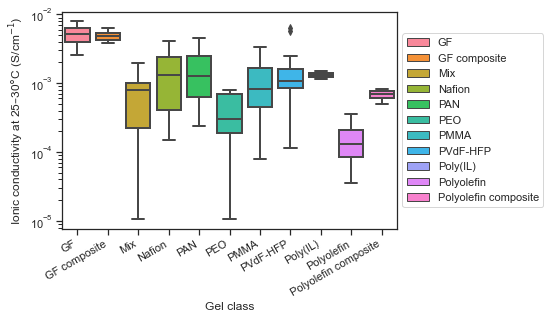

In [122]:
sns.set()
sns.set_style("white")
sns.set_style('ticks')
sns.set_context("notebook", rc={'axes.grid': True})
sns.set_palette('Set1')


# All classes that do not have more than two independent references are excluded
df_GPE_box = df_GPE[
                (df_GPE['class'] != 'Other') & 
                (df_GPE['class'] != 'PVP') & 
                (df_GPE['class'] != 'Ceramic-composite')
                ]

GPE_box = sns.boxplot(
                x='class', 
                y='conductivity_(20-30)degC', 
                hue='class', 
                data=df_GPE_box,
                dodge=False,
                linewidth=2,
                saturation=1.5,
                ).set(
    xlabel='Gel class',
    ylabel='Ionic conductivity at 25$\endash$30$\degree$C (S/cm$^{-1}$)',
    yscale='log',
    )
plt.xticks(
    rotation=30,
    horizontalalignment='right',
    )

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.savefig('.\FIGURES\GPE_class-vs-cond_box.svg', 
           transparent=False)
plt.savefig('.\FIGURES\GPE_class-vs-cond_box.png', 
           transparent=False,
           bbox_inches='tight',
           dpi=300)

## Figure XX - Gel conductivity vs. porosity
### Caption
dfsfddfs

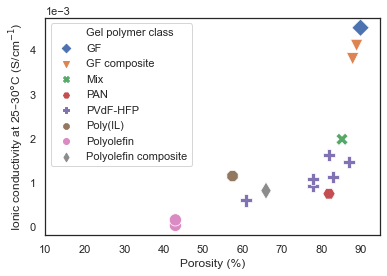

In [123]:
df_cond_por = df_GPE.loc[:, ('UID', 'class', 'porosity', 'conductivity_(20-30)degC')]
df_cond_por.dropna(inplace=True)
df_cond_por.sort_values(by=['class'], inplace=True)

sns.set()
sns.set_style("white")
sns.set_context("notebook",rc={'axes.grid': True})

markers = ['D', 'v', 'X', 'H', 'P', '8', 'o', 'd']

fig_cond = sns.scatterplot(
                x='porosity', 
                y='conductivity_(20-30)degC', 
                hue='class', 
                data=df_cond_por, 
                s=150, 
                style='class', 
                markers=markers
                )

plt.xlim(10, 95)
plt.xlabel('Porosity (%)')
plt.ylabel('Ionic conductivity at 25$\endash$30$\degree$C (S/cm$^{-1}$)')
plt.legend().texts[0].set_text("Gel polymer class")
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0))

plt.savefig('.\FIGURES\GPE_porosity-vs-conductivity.svg', 
           transparent=False)
plt.savefig('.\FIGURES\GPE_porosity-vs-conductivity.png', 
           transparent=False,
           bbox_inches='tight',
           dpi=300)

## Figure XX - GPE tensile strength vs conductivity

### Caption
fdfdfd

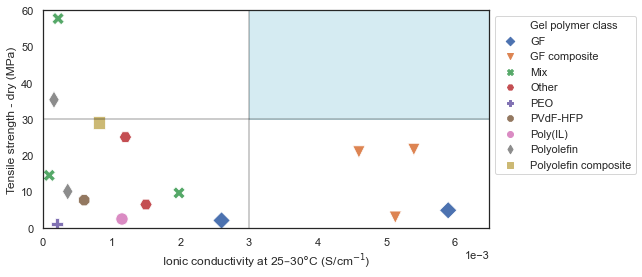

In [124]:
df_cond_strength = df_GPE.loc[:, ('UID', 'class', 'strength_tensile_dry', 'conductivity_(20-30)degC')]
df_cond_strength.dropna(inplace=True)
df_cond_strength.sort_values(by=['class'], inplace=True)

sns.set()
sns.set_style("white")
sns.set_context("notebook",rc={'axes.grid': True})
plt.figure(figsize=(8, 4))
markers = ['D', 'v', 'X', 'H', 'P', '8', 'o', 'd', 's']

fig_cond = sns.scatterplot(
                x='conductivity_(20-30)degC', 
                y='strength_tensile_dry', 
                hue='class', 
                data=df_cond_strength, 
                s=150, 
                style='class', 
                markers=markers,
                )

plt.xlabel('Ionic conductivity at 25$\endash$30$\degree$C (S/cm$^{-1}$)')
plt.ylabel('Tensile strength - dry (MPa)')

plt.xlim(0, 0.0065)
plt.ylim(0, 60)
plt.ticklabel_format(style='sci', axis='x',scilimits=(0,0))

plt.plot([0.003, 0.003], [-10, 80], linewidth=2, color='black', alpha=0.2)
plt.plot([-1, 1], [30, 30], linewidth=2, color='black', alpha=0.2)
fig_cond.add_patch(patches.Rectangle((0.003, 30), 1, 60, color='lightblue', alpha=0.5))

plt.legend(loc=2, bbox_to_anchor=(1.0, 1)).texts[0].set_text("Gel polymer class")


plt.savefig('.\FIGURES\GPE_strength-vs-conductivity.svg', 
           transparent=False)
plt.savefig('.\FIGURES\GPE_strength-vs-conductivity.png', 
           transparent=False,
           bbox_inches='tight',
           dpi=300)

## Figure XX - conductivity vs. glass transition temperature
### Caption


<Figure size 576x288 with 0 Axes>

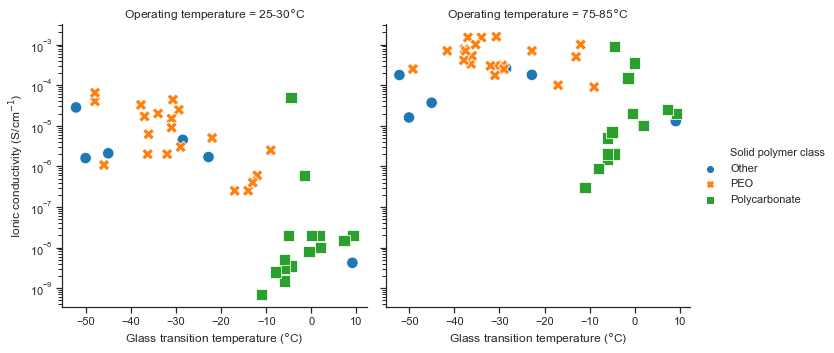

In [125]:
df_SPE_Tg_slice = df_SPE.loc[
                (df_SPE['class'] == 'PEO') | 
                (df_SPE['class'] == 'Polycarbonate') |
                (df_SPE['class'] == 'Other')  
                ]

df_SPE_Tg = df_SPE_Tg_slice[
            [
            'class', 
            'conductivity_(20-30)degC', 
            'conductivity_(75-85)degC',
            'temperature_glass_transition'
            ]
            ]

df_SPE_Tg.rename(columns={'conductivity_(20-30)degC': '25-30$\degree$C', 'conductivity_(75-85)degC': '75-85$\degree$C', 'class' : 'Solid polymer class'}, inplace=True)

df_SPE_Tg_melt = pd.melt(df_SPE_Tg,
                        id_vars=['Solid polymer class', 'temperature_glass_transition'], 
                        value_vars = ['25-30$\degree$C', '75-85$\degree$C'],
                        var_name='Operating temperature', 
                        value_name='Conductivity')

sns.set()
sns.set_style("white")
sns.set_style("ticks")
sns.set_palette('tab10')
sns.set_context("notebook",rc={'axes.grid': True})
plt.figure(figsize=(8, 4))

SPE_Tg = sns.relplot(
            x="temperature_glass_transition", 
            y="Conductivity",
            col="Operating temperature", 
            hue="Solid polymer class", 
            style="Solid polymer class",
            kind="scatter",
            s=130, 
            data=df_SPE_Tg_melt,
            ).set(
                yscale='log'
            )

SPE_Tg.axes[0,0].set_xlabel('Glass transition temperature ($\degree$C)')
SPE_Tg.axes[0,0].set_ylabel('Ionic conductivity (S/cm$^{-1}$)')
SPE_Tg.axes[0,1].set_xlabel('Glass transition temperature ($\degree$C)')

plt.savefig('.\FIGURES\SPE_Tg-vs-conductivity.svg', 
           transparent=False)
plt.savefig('.\FIGURES\SPE_Tg-vs-conductivity.png', 
           transparent=False,
           bbox_inches='tight',
           dpi=300)

## Figure XX - high temp conductivity vs. sodium concentration

### Caption




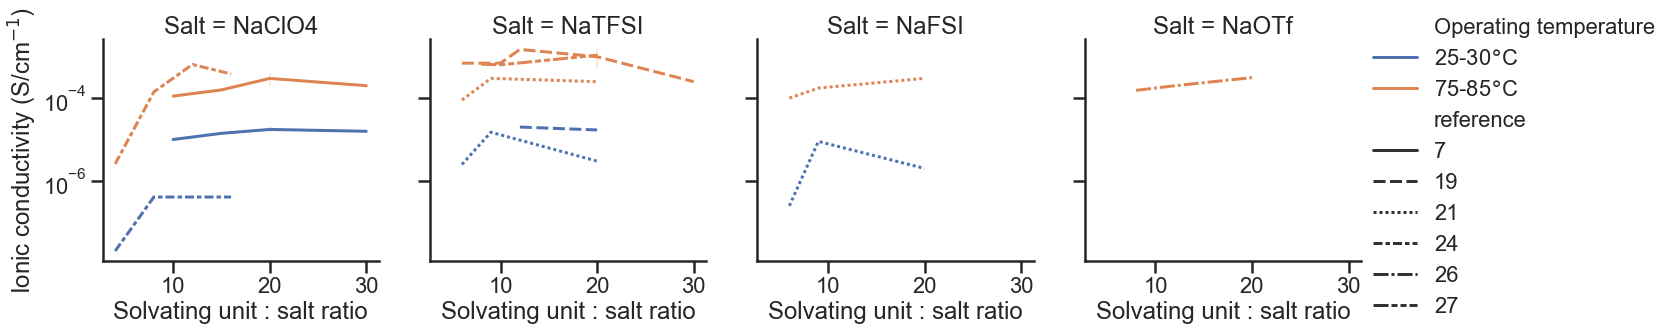

In [126]:
df_SPE_salt_slice = df_SPE.loc[
                (df_SPE['author_corresponding'] == 'Hwang') | 
                (df_SPE['author_corresponding'] == 'Moreno') |
                (df_SPE['author_corresponding'] == 'Boschin') |  
                (df_SPE['author_corresponding'] == 'Skaarup') |
                (df_SPE['author_corresponding'] == 'Yanping Ma') 
                ]

df_SPE_salt = df_SPE_salt_slice[
            [
            'salt', 
            'conductivity_(20-30)degC', 
            'conductivity_(75-85)degC',
            'solvating-unit-to-sodium_ratio',
            'reference'
            ]
            ]

df_SPE_salt.rename(columns={'conductivity_(20-30)degC': '25-30$\degree$C', 'conductivity_(75-85)degC': '75-85$\degree$C', 'salt' : 'Salt'}, inplace=True)

df_SPE_salt_melt = pd.melt(df_SPE_salt,
                        id_vars=['Salt', 'reference', 'solvating-unit-to-sodium_ratio'], 
                        value_vars = ['25-30$\degree$C', '75-85$\degree$C'],
                        var_name='Operating temperature', 
                        value_name='Conductivity')

df_SPE_salt_plot = df_SPE_salt_melt.loc[
                df_SPE_salt_melt['Conductivity'].notnull()  
                ]

sns.set()
sns.set_style("white")
sns.set(style="ticks", rc={"lines.linewidth": 100})
sns.set_context("poster",rc={'axes.grid': True})

SPE_salt = sns.relplot(
            x="solvating-unit-to-sodium_ratio", 
            y="Conductivity",
            col="Salt", 
            hue="Operating temperature", 
            style="reference",
            kind="line", 
            data=df_SPE_salt_plot,
            ).set(
                yscale='log'
            )

SPE_salt.axes[0,0].set_xlabel('Solvating unit : salt ratio')
SPE_salt.axes[0,0].set_ylabel('Ionic conductivity (S/cm$^{-1}$)')
SPE_salt.axes[0,1].set_xlabel('Solvating unit : salt ratio')
SPE_salt.axes[0,2].set_xlabel('Solvating unit : salt ratio')
SPE_salt.axes[0,3].set_xlabel('Solvating unit : salt ratio')

plt.savefig('.\FIGURES\SPE_conductivity-vs-salt-ratio.svg', 
           transparent=False)
plt.savefig('.\FIGURES\SPE_conductivity-vs-salt-ratio.png', 
           transparent=False,
           bbox_inches='tight',
           dpi=300)